<a href="https://colab.research.google.com/github/Shreya21052004/Email-Spam/blob/main/email_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd

from sklearn.model_selection import train_test_split

from  sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('mail_data.csv')

In [ ]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
data = df.where((pd.notnull(df)),'')

In [ ]:
data.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.loc[data['Category'] =='spam','Category']=0
data.loc[data['Category']=='ham','Category'] = 1

In [ ]:
X=data['Message']
Y=data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [ ]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


0 means spam and 1 means ham

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 3)

In [ ]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming X_train contains your training data
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')

Y_test = Y_test.astype('int')


In [ ]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [ ]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [ ]:
prediction_on_training_data=model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train,prediction_on_training_data)

In [ ]:
print('Accuracy on training data :', accuracy_on_training_data)

Accuracy on training data : 0.9670181736594121


In [ ]:
prediction_on_test_data=model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [ ]:
print('Accuracy on test data :', accuracy_on_test_data)

Accuracy on test data : 0.9659192825112107


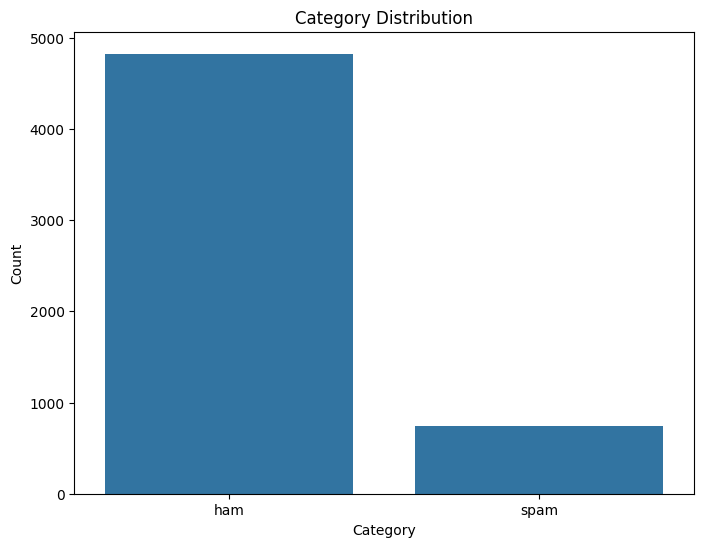

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from CSV file
df = pd.read_csv('mail_data.csv')

# Category Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


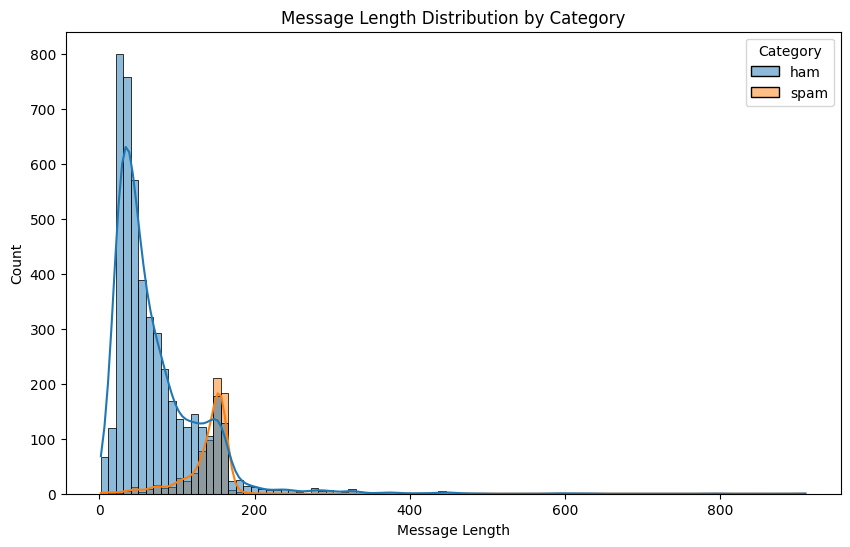

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from CSV file
df = pd.read_csv('mail_data.csv')

# Message Length Analysis
df['Message_Length'] = df['Message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Message_Length', hue='Category', kde=True)
plt.title('Message Length Distribution by Category')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('mail_data.csv')

# Data preprocessing
data = df.dropna()  # Drop rows with missing values, if any
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})  # Map 'ham' to 0 and 'spam' to 1

# Split data into features (X) and target (y)
X = data['Message']
y = data['Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_vec)
y_pred_test = rf_model.predict(X_test_vec)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy*100)
print("Testing Accuracy:", test_accuracy*100)

Training Accuracy: 100.0
Testing Accuracy: 98.29596412556054


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the preprocessed data (with 'Category' column indicating numerical labels)
data = pd.read_csv('mail_data.csv')

# Separate features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train k-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_vec, y_train)

# Predictions
y_pred_train = knn_model.predict(X_train_vec)
y_pred_test = knn_model.predict(X_test_vec)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9196769127215616
Testing Accuracy: 0.9192825112107623


In [ ]:
from collections import Counter
import re

# Function to tokenize text
def tokenize_text(text):
    # Use regular expression to tokenize text
    words = re.findall(r'\b\w+\b', text.lower())
    return words

# Tokenize the spam messages into individual words
spam_messages = ' '.join(df[df['Category'] == 'spam']['Message'])
spam_tokens = tokenize_text(spam_messages)

# Count the occurrences of each word
word_counts = Counter(spam_tokens)

# Print the top 10 most common keywords
print("Top 10 Keywords in Spam Messages:")
for word, count in word_counts.most_common(10):
    print(word, ':', count)


Top 10 Keywords in Spam Messages:
to : 688
a : 380
call : 352
you : 297
your : 264
free : 224
2 : 207
for : 204
the : 203
now : 199


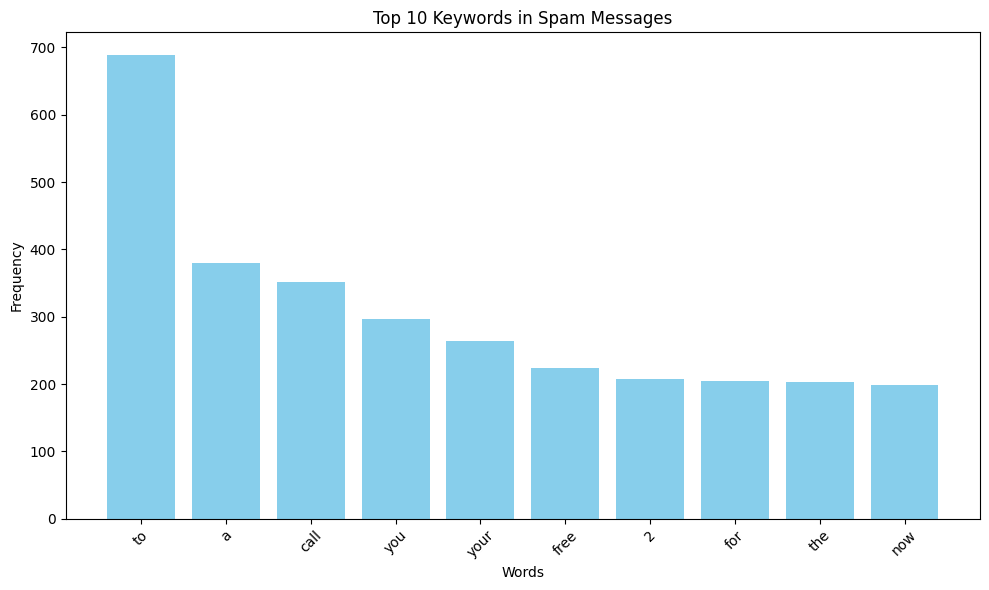

In [ ]:
import matplotlib.pyplot as plt

# Get the top 10 most common keywords and their counts
top_words = [word for word, _ in word_counts.most_common(10)]
word_counts = [count for _, count in word_counts.most_common(10)]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_words, word_counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Keywords in Spam Messages')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


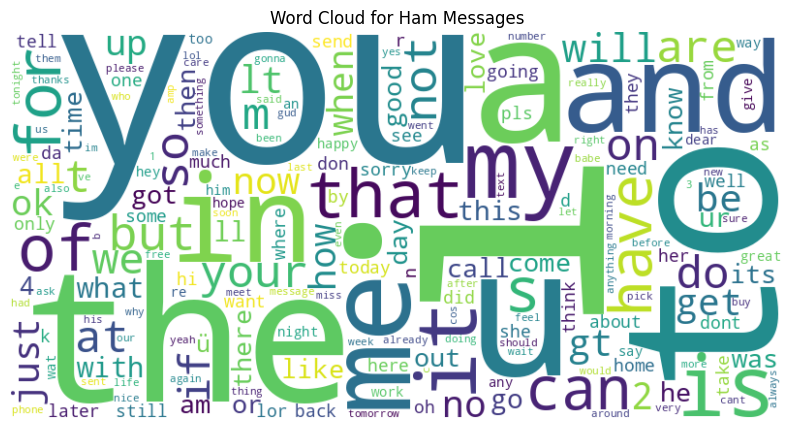

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re

# Function to tokenize text
def tokenize_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words

# Tokenize the ham messages into individual words
ham_messages = ' '.join(df[df['Category'] == 'ham']['Message'])
ham_tokens = tokenize_text(ham_messages)

# Count the occurrences of each word in the ham messages
ham_word_counts = Counter(ham_tokens)

# Generate a word cloud for ham messages
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ham_word_counts)

# Plot the word cloud for ham messages
plt.figure(figsize=(10, 6))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()


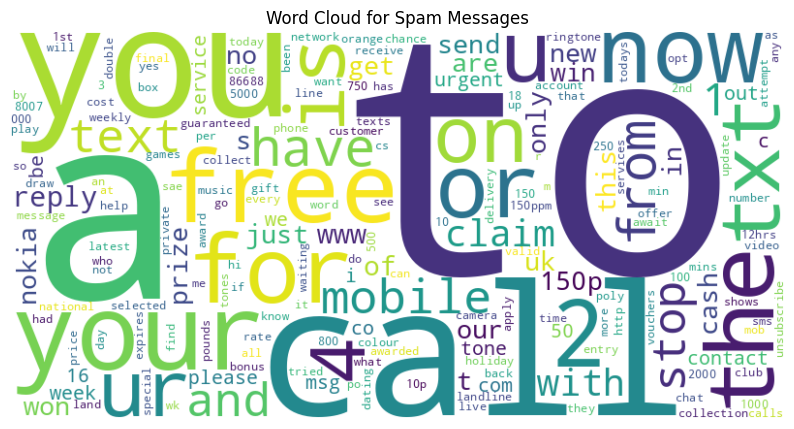

In [ ]:
# Tokenize the spam messages into individual words
spam_messages = ' '.join(df[df['Category'] == 'spam']['Message'])
spam_tokens = tokenize_text(spam_messages)

# Count the occurrences of each word in the spam messages
spam_word_counts = Counter(spam_tokens)

# Generate a word cloud for spam messages
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_word_counts)

# Plot the word cloud for spam messages
plt.figure(figsize=(10, 6))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import re

# Function to tokenize text
def tokenize_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words

# Tokenize the spam messages into individual words
spam_messages = ' '.join(df[df['Category'] == 'spam']['Message'])
spam_tokens = tokenize_text(spam_messages)

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment of each word in spam messages
sentiment_scores = {word: sid.polarity_scores(word)['compound'] for word in spam_tokens}

# Identify words associated with positive sentiment
positive_words = [word for word, score in sentiment_scores.items() if score > 0]

# Identify words associated with negative sentiment
negative_words = [word for word, score in sentiment_scores.items() if score < 0]

# Count the occurrences of positive and negative words
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)

# Print the most common positive and negative words
print("Top 10 Most Common Positive Words in Spam Messages:")
print(positive_word_counts.most_common(10))
print("\nTop 10 Most Common Negative Words in Spam Messages:")
print(negative_word_counts.most_common(10))


Top 10 Most Common Positive Words in Spam Messages:
[('free', 1), ('win', 1), ('darling', 1), ('like', 1), ('fun', 1), ('ok', 1), ('winner', 1), ('valued', 1), ('prize', 1), ('reward', 1)]

Top 10 Most Common Negative Words in Spam Messages:
[('no', 1), ('miss', 1), ('charged', 1), ('devils', 1), ('po', 1), ('gravel', 1), ('stop', 1), ('pay', 1), ('blind', 1), ('hide', 1)]


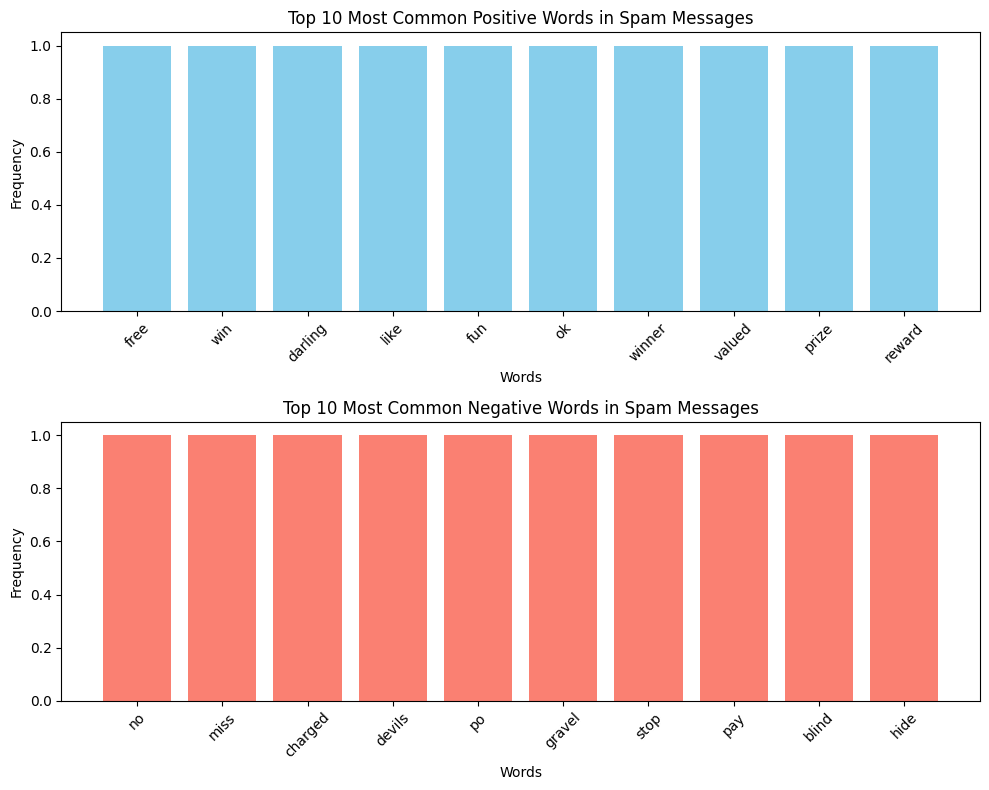

In [ ]:
import matplotlib.pyplot as plt

# Define the top 10 most common positive and negative words and their frequencies
top_positive_words = ['free', 'win', 'darling', 'like', 'fun', 'ok', 'winner', 'valued', 'prize', 'reward']
positive_word_counts = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

top_negative_words = ['no', 'miss', 'charged', 'devils', 'po', 'gravel', 'stop', 'pay', 'blind', 'hide']
negative_word_counts = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Create subplots for positive and negative words
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot bar chart for top 10 most common positive words
axs[0].bar(top_positive_words, positive_word_counts, color='skyblue')
axs[0].set_title('Top 10 Most Common Positive Words in Spam Messages')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Frequency')

# Plot bar chart for top 10 most common negative words
axs[1].bar(top_negative_words, negative_word_counts, color='salmon')
axs[1].set_title('Top 10 Most Common Negative Words in Spam Messages')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('Frequency')

# Rotate x-axis labels for better readability
plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=45)

# Adjust layout
plt.tight_layout()1

# Show the plots
plt.show()


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# RANDOM FOREST CLASSIFIER

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('mail_data.csv')

# Data preprocessing
data = df.dropna()  # Drop rows with missing values, if any
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})  # Map 'ham' to 0 and 'spam' to 1

# Split data into features (X) and target (y)
X = data['Message']
y = data['Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)

# Predictions
y_pred_train = rf_model.predict(X_train_vec)
y_pred_test = rf_model.predict(X_test_vec)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy*100)
print("Testing Accuracy:", test_accuracy*100)

Training Accuracy: 100.0
Testing Accuracy: 98.29596412556054


# KNEIGHBORSCLASSIFIER

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the preprocessed data (with 'Category' column indicating numerical labels)
data = pd.read_csv('mail_data.csv')

# Separate features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train k-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_vec, y_train)

# Predictions
y_pred_train = knn_model.predict(X_train_vec)
y_pred_test = knn_model.predict(X_test_vec)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9196769127215616
Testing Accuracy: 0.9192825112107623


In [ ]:
input_your_mail = ["WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
if(prediction[0]==1):
  print("ham mail")
else:
  print("Spam mail")


Spam mail
